In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json as json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
citiesa = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in citiesa:
        citiesa.append(city)

# Print the city count to confirm sufficient count
print(citiesa)

['cayenne', 'nouadhibou', 'mayna', 'pevek', 'albany', 'saint-denis', 'ushuaia', 'bukama', 'sentyabrskiy', 'beyneu', 'yellowknife', 'savannakhet', 'hobart', 'kurchum', 'carolina', 'berlevag', 'jamestown', 'los llanos de aridane', 'ribeira grande', 'nikolskoye', 'san ignacio', 'faanui', 'bredasdorp', 'imbituba', 'busselton', 'yanan', 'new norfolk', 'saskylakh', 'atuona', 'alice springs', 'kaitangata', 'saint-augustin', 'trinidad', 'tuktoyaktuk', 'georgetown', 'rikitea', 'hermanus', 'chambery', 'qaanaaq', 'bairiki', 'hurup', 'asyut', 'umzimvubu', 'norman wells', 'carnarvon', 'biak', 'saint-philippe', 'mataura', 'amahai', 'butaritari', 'gat', 'kushima', 'kaoma', 'darnah', 'vaini', 'kijang', 'yashkul', 'smithers', 'cherskiy', 'teontepec', 'tumannyy', 'dunedin', 'kapit', 'finspang', 'houston', 'punta arenas', 'upernavik', 'ahuimanu', 'bolshoye selo', 'gornopravdinsk', 'cumra', 'mar del plata', 'manono', 'provideniya', 'lubao', 'louisbourg', 'praia da vitoria', 'kahului', 'boende', 'khatanga'

In [3]:
#test cell
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "https://api.openweathermap.org/data/2.5/weather?"
#test city
city = "minneapolis"
lat=[]
query_url = url  + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"


response = requests.get(query_url).json()
lat.append(response['coord']['lat'])
print(lat)
print(json.dumps(response, indent=4, sort_keys=True))

[44.98]
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 44.98,
        "lon": -93.2638
    },
    "dt": 1613266972,
    "id": 5037649,
    "main": {
        "feels_like": -18.56,
        "humidity": 54,
        "pressure": 1031,
        "temp": -7.17,
        "temp_max": -5.8,
        "temp_min": -7.6
    },
    "name": "Minneapolis",
    "sys": {
        "country": "US",
        "id": 4984,
        "sunrise": 1613222198,
        "sunset": 1613259486,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 310,
        "speed": 8.05
    }
}


In [4]:
url = "https://api.openweathermap.org/data/2.5/weather?"

citiesb=[]
temp = []
lat = []
lon = []
humidity = []
cloudiness = []
wind_speed = []

for city in citiesa:
    query_url = url  + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    print(f"gathering data on {city}")
    response = requests.get(query_url).json()
    try:
        citiesb.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
    except:
        print(f"Data not found! Skipping {city} Entry")
        pass
    
    time.sleep(1.1)


gathering data on cayenne
gathering data on nouadhibou
gathering data on mayna
gathering data on pevek
gathering data on albany
gathering data on saint-denis
gathering data on ushuaia
gathering data on bukama
gathering data on sentyabrskiy
Data not found! Skipping sentyabrskiy Entry
gathering data on beyneu
gathering data on yellowknife
gathering data on savannakhet
gathering data on hobart
gathering data on kurchum
gathering data on carolina
gathering data on berlevag
gathering data on jamestown
gathering data on los llanos de aridane
gathering data on ribeira grande
gathering data on nikolskoye
gathering data on san ignacio
gathering data on faanui
gathering data on bredasdorp
gathering data on imbituba
gathering data on busselton
gathering data on yanan
Data not found! Skipping yanan Entry
gathering data on new norfolk
gathering data on saskylakh
gathering data on atuona
gathering data on alice springs
gathering data on kaitangata
gathering data on saint-augustin
gathering data on t

gathering data on fortuna
gathering data on lai
gathering data on petropavlovsk-kamchatskiy
gathering data on rokytne
gathering data on moron
gathering data on gayeri
gathering data on urumqi
gathering data on hambantota
gathering data on kirakira
gathering data on tabiauea
Data not found! Skipping tabiauea Entry
gathering data on price
gathering data on santa maria del oro
gathering data on sistranda
gathering data on college
gathering data on bilibino
gathering data on the valley
gathering data on coihaique
gathering data on hofn
gathering data on comodoro rivadavia
gathering data on santa eulalia del rio
Data not found! Skipping santa eulalia del rio Entry
gathering data on ushumun
gathering data on beira
gathering data on laguna
gathering data on maceio
gathering data on vestmannaeyjar
gathering data on ahipara
gathering data on ereymentau
gathering data on lavrentiya
gathering data on placerville
gathering data on saint george
gathering data on lima
gathering data on plouzane
gath

gathering data on la ronge
gathering data on kholm
gathering data on dezhou
gathering data on banganapalle
gathering data on bhayavadar
gathering data on rimbey
gathering data on hobyo
gathering data on narsaq
gathering data on pasni
gathering data on idrinskoye
gathering data on chipiona
gathering data on aleksandrow kujawski
gathering data on chhukha
Data not found! Skipping chhukha Entry
gathering data on la esperanza
gathering data on mahina
gathering data on bacuit
Data not found! Skipping bacuit Entry
gathering data on ohara
gathering data on chaman
gathering data on lucea
gathering data on bardiyah
gathering data on usinsk
gathering data on havoysund
gathering data on wendo
gathering data on borazjan
gathering data on langevag
gathering data on opmeer
gathering data on ashland
gathering data on tagbina
gathering data on bundaberg
gathering data on sabang
gathering data on sonoita
gathering data on presidente olegario
gathering data on eureka
gathering data on erenhot
gathering d

In [5]:
# create a data frame
weather_dict = {
    "city": citiesb,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,lon,temp,humidity,cloudiness,wind speed
0,Cayenne,4.9333,-52.3333,80.60,78,75,14.97
1,Nouadhibou,20.9310,-17.0347,62.60,82,0,18.41
2,Mayna,54.1135,47.6231,0.25,94,4,7.70
3,Pevek,69.7008,170.3133,-13.72,88,91,3.49
4,Albany,42.6001,-73.9662,18.72,37,100,2.55
...,...,...,...,...,...,...,...
561,Richards Bay,-28.7830,32.0377,75.04,95,100,2.80
562,Husavik,66.0449,-17.3389,37.40,70,40,21.85
563,Nizwá,22.9333,57.5333,56.07,61,0,2.10
564,Teknāf,20.8624,92.3058,68.36,51,0,5.46


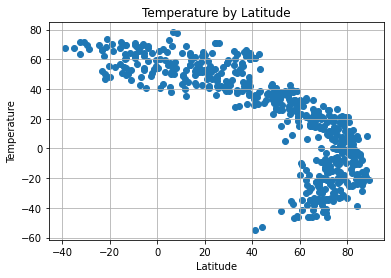

In [6]:
# Build a scatter plot for each data type
plt.scatter(weather_data["temp"], weather_data["lat"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature by Latitude")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperaturebyLat.png")

# Show plot
plt.show()

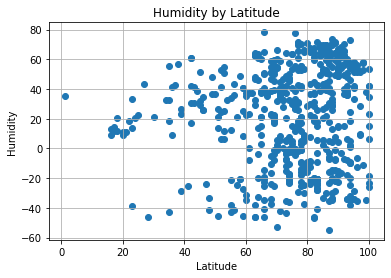

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["humidity"], weather_data["lat"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity by Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumiditybyLat.png")

# Show plot
plt.show()

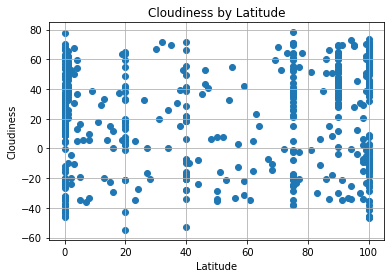

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["cloudiness"], weather_data["lat"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness by Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessbyLat.png")

# Show plot
plt.show()

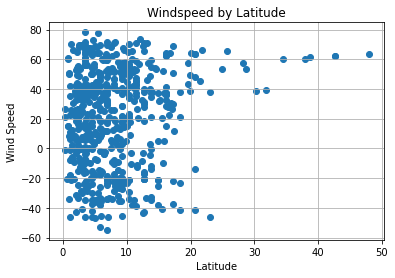

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["wind speed"], weather_data["lat"], marker="o")

# Incorporate the other graph properties
plt.title("Windspeed by Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindspeedbyLat.png")

# Show plot
plt.show()

In [10]:
# Save as a csv
weather_data.to_csv("weather.csv")

#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude